# Part 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], 
              [4, 2], [4, 4], [4, 0]])
print(X)

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


In [3]:
Y = pd.DataFrame(X,columns=["A","B"])
print(Y)

   A  B
0  1  2
1  1  4
2  1  0
3  4  2
4  4  4
5  4  0


In [4]:
kmeans = KMeans(n_clusters=2)

In [5]:
kmeans.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [7]:
kmeans.cluster_centers_

array([[4., 2.],
       [1., 2.]])

In [8]:
Y['cluster_id'] = kmeans.labels_

In [9]:
Y

,A,B,cluster_id
0,1,2,1
1,1,4,1
2,1,0,1
3,4,2,0
4,4,4,0
5,4,0,0


In [10]:
kmeans.inertia_

16.0

In [11]:
kmeans.predict([[0,0],[4,4]])

array([1, 0])

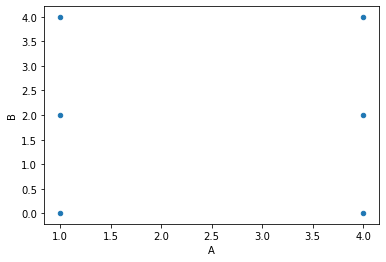

In [12]:
Y.plot(kind='scatter',x='A',y='B')

# Part -2 

In [13]:
cereal_df = pd.read_csv("Cereals.csv",index_col='name')

In [14]:
cereal_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [15]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [16]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  77 non-null     int64  
 1   protein   77 non-null     int64  
 2   fat       77 non-null     int64  
 3   sodium    77 non-null     int64  
 4   fiber     77 non-null     float64
 5   carbo     76 non-null     float64
 6   sugars    76 non-null     float64
 7   potass    75 non-null     float64
 8   vitamins  77 non-null     int64  
 9   shelf     77 non-null     int64  
 10  weight    77 non-null     float64
 11  cups      77 non-null     float64
 12  rating    77 non-null     float64
dtypes: float64(7), int64(6)
memory usage: 8.4+ KB


In [17]:
cereal_df.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer()

In [20]:
imputer.fit(cereal_df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [21]:
cereal_df = pd.DataFrame(imputer.transform(cereal_df),columns=cereal_df.columns,index=cereal_df.index)

In [22]:
cereal_df.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [23]:
cereal_df.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.00,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.00,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.00,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.00,0.50,93.704912
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.00,0.75,34.384843
Apple_Cinnamon_Cheerios,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.000000,25.0,1.0,1.00,0.75,29.509541
Apple_Jacks,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.000000,25.0,2.0,1.00,1.00,33.174094
Basic_4,130.0,3.0,2.0,210.0,2.0,18.0,8.0,100.000000,25.0,3.0,1.33,0.75,37.038562
Bran_Chex,90.0,2.0,1.0,200.0,4.0,15.0,6.0,125.000000,25.0,1.0,1.00,0.67,49.120253


In [24]:
cereal_df = cereal_df.drop(['rating','shelf'],axis=1)

### Standardizing the data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scalar = StandardScaler()
scalar.fit(cereal_df)
std_cereal_df = pd.DataFrame(scalar.transform(cereal_df),columns=cereal_df.columns,index=cereal_df.index)

In [27]:
std_cereal_df.tail(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
name,,,,,,,,,,,
Special_K,0.161019,3.176134,-1.013072,0.844374,-0.486498,0.310501,-0.931712,-0.632618,-0.14627,-0.198067,0.774053
Strawberry_Fruit_Wheats,-0.872189,-0.501495,-1.013072,-1.737087,0.358155,0.051181,-0.468901,-0.125558,-0.14627,-0.198067,0.774053
Total_Corn_Flakes,0.161019,-0.501495,-0.012988,0.484170,-0.908824,1.607098,-0.931712,-0.922366,3.23257,-0.198067,0.774053
Total_Raisin_Bran,1.710832,0.417912,-0.012988,0.364102,0.780481,0.051181,1.613750,1.902682,3.23257,3.146493,0.774053
Total_Whole_Grain,-0.355585,0.417912,-0.012988,0.484170,0.358155,0.310501,-0.931712,0.164191,3.23257,-0.198067,0.774053
Triples,0.161019,-0.501495,-0.012988,1.084510,-0.908824,1.607098,-0.931712,-0.560180,-0.14627,-0.198067,-0.307262
Trix,0.161019,-1.420902,-0.012988,-0.236238,-0.908824,-0.467457,1.150938,-1.067240,-0.14627,-0.198067,0.774053
Wheat_Chex,-0.355585,0.417912,-0.012988,0.844374,0.358155,0.569820,-0.931712,0.236628,-0.14627,-0.198067,-0.653283
Wheaties,-0.355585,0.417912,-0.012988,0.484170,0.358155,0.569820,-0.931712,0.164191,-0.14627,-0.198067,0.774053


In [28]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [29]:
param_grid = {'n_clusters':list(range(2,10))}

In [30]:
kmeans1 = KMeans()

In [31]:
gs_object = GridSearchCV(kmeans1,param_grid,verbose=15,n_jobs=-1)

In [32]:
gs_object.fit(std_cereal_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=None, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=15)

In [33]:
gs_object.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
cereal_df['Category'] = gs_object.predict(std_cereal_df)

In [35]:
cereal_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,Category
name,,,,,,,,,,,,
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33,6
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00,4
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33,6
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50,6
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.000000,25.0,1.0,0.75,2
Trix,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.000000,25.0,1.0,1.00,0
Wheat_Chex,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.000000,25.0,1.0,0.67,8


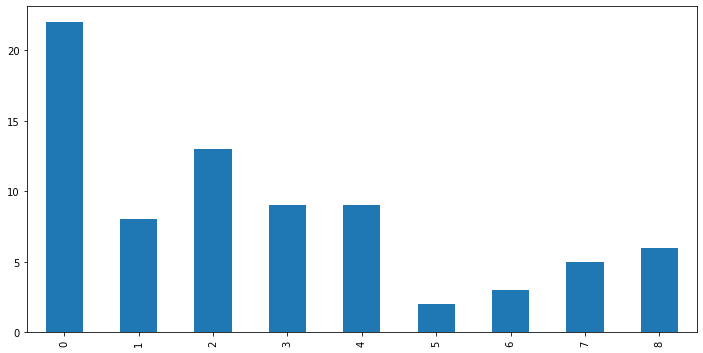

In [36]:
plt.figure(figsize=(12,6))
cereal_df.Category.value_counts(sort=False).plot(kind='bar')
plt.show()

In [37]:
cat_name_dict = {}
for i in range(9):
    cat_name_dict[i] = list(cereal_df[cereal_df.Category==i].index)
cat_name_dict

{0: ['Almond_Delight',
  'Apple_Cinnamon_Cheerios',
  'Apple_Jacks',
  "Cap'n'Crunch",
  'Cinnamon_Toast_Crunch',
  'Cocoa_Puffs',
  'Corn_Pops',
  'Count_Chocula',
  'Crispy_Wheat_&_Raisins',
  'Froot_Loops',
  'Frosted_Flakes',
  'Fruity_Pebbles',
  'Golden_Crisp',
  'Golden_Grahams',
  'Honey_Graham_Ohs',
  'Honey_Nut_Cheerios',
  'Honey-comb',
  'Lucky_Charms',
  'Nut&Honey_Crunch',
  'Smacks',
  'Trix',
  'Wheaties_Honey_Gold'],
 1: ['Cream_of_Wheat_(Quick)',
  'Frosted_Mini-Wheats',
  'Maypo',
  'Raisin_Squares',
  'Shredded_Wheat',
  "Shredded_Wheat_'n'Bran",
  'Shredded_Wheat_spoon_size',
  'Strawberry_Fruit_Wheats'],
 2: ['Cheerios',
  'Corn_Chex',
  'Corn_Flakes',
  'Crispix',
  'Double_Chex',
  'Kix',
  'Multi-Grain_Cheerios',
  'Nutri-grain_Wheat',
  'Rice_Chex',
  'Rice_Krispies',
  'Special_K',
  'Triples',
  'Wheaties'],
 3: ['Basic_4',
  'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
  'Fruitful_Bran',
  'Mueslix_Crispy_Blend',
  'Nutri-Grain_Almond-Raisin',
  'Oatmeal_Raisi

In [39]:
gs_object.best_estimator_.cluster_centers_

array([[ 0.20798344, -0.91940708,  0.03247027,  0.12396629, -0.65926792,
        -0.59711721,  0.99316184, -0.70922536, -0.14627013, -0.19806746,
         0.20980312],
       [-0.74303762,  0.18806054, -0.88806191, -1.77460866,  0.09420072,
         0.56982042, -1.01848913,  0.10744841, -0.70941013, -0.34021128,
         0.03875881],
       [-0.07741319,  0.13501782, -0.55149506,  0.97367816, -0.45401139,
         1.18819763, -0.93171203, -0.55460839, -0.14627013, -0.19806746,
         0.90048338],
       [ 1.25162795,  0.41791231,  0.43149382,  0.4174658 ,  0.71009334,
         0.06558811,  0.94524452,  1.1944078 ,  0.22915654,  2.14312471,
        -0.49949558],
       [ 0.56282258,  0.92869402,  1.76493961, -0.70983913,  0.22676427,
        -0.57399077,  0.1488574 ,  0.47808506, -0.39655457, -0.19806746,
        -0.58600075],
       [-2.93860476, -0.96119831, -1.01307245, -1.91718939, -0.69766122,
        -0.85643669, -1.62592883, -0.9585847 , -1.27255013, -3.54262772,
         0.774

In [40]:
gs_object.best_estimator_.labels_

array([6, 4, 6, 6, 0, 0, 0, 3, 8, 8, 0, 2, 0, 4, 0, 2, 2, 0, 0, 4, 1, 2,
       0, 2, 0, 0, 1, 3, 3, 0, 0, 0, 8, 8, 4, 0, 0, 0, 7, 7, 2, 4, 0, 1,
       4, 4, 3, 2, 0, 3, 2, 3, 3, 7, 5, 5, 8, 4, 3, 4, 1, 2, 2, 1, 1, 1,
       0, 2, 1, 7, 3, 7, 2, 0, 8, 2, 0])

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
wss = {}
for k in range(2,21):
    kmeans_loop = KMeans(k,n_init =\30,n_jobs=-1,verbose=0).fit(std_cereal_df)
    clusters = kmeans_loop.labels_
    labels = kmeans_loop.predict(std_cereal_df)
    print(k,silhouette_score(std_cereal_df,labels))
    wss[k] = kmeans_loop.inertia_


2 0.21735076008649726
3 0.17149087598542434
4 0.20796470846948673
5 0.2516945040894348
6 0.2626846403689661
7 0.27079329341955977
8 0.3020738197551101
9 0.30823117906092523
10 0.30887614260455615
11 0.3190539172058982
12 0.2896279015035254
13 0.30315722519847543
14 0.3120528411876249
15 0.3285853178626663
16 0.3057336476623562
17 0.3210231240796973
18 0.30576000708316814
19 0.3013996277236757
20 0.29904838996468325


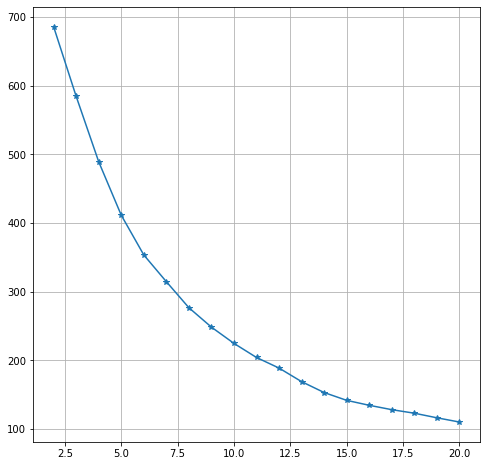

In [55]:
plt.figure(figsize=(8,8))
plt.plot(list(wss.keys()),list(wss.values()),marker='*')
plt.grid()
plt.show()

In [47]:
wss.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

## Choosing 8 as the k, building new model

In [56]:
best_kmeans = KMeans(9)
best_kmeans.fit(std_cereal_df)
best_kmeans_labels = best_kmeans.predict(std_cereal_df)

In [63]:
output_df = cereal_df.drop('Category',axis=1)
output_df['Category'] = best_kmeans_labels

In [67]:
output_df.Category.value_counts()

1    22
0    12
7     9
4     9
6     8
8     7
3     5
2     3
5     2
Name: Category, dtype: int64

In [68]:
output_df.groupby("Category").mean()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
Category,,,,,,,,,,,
0,100.000000,3.333333,0.666667,198.750000,2.666667,16.000000,4.000000,103.750000,25.000000,1.00000,0.803333
1,110.909091,1.545455,1.045455,170.000000,0.590909,12.500000,11.318182,49.712121,25.000000,1.00000,0.869545
2,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.00000,0.386667
3,112.000000,2.600000,0.800000,212.000000,1.400000,18.800000,4.800000,69.000000,100.000000,1.06000,0.950000
4,117.777778,3.555556,2.777778,100.555556,2.688889,12.589181,7.669591,131.666667,19.444444,1.00000,0.685556
5,50.000000,1.500000,0.000000,0.000000,0.500000,11.500000,0.000000,32.500000,0.000000,0.50000,1.000000
6,92.500000,2.750000,0.125000,11.875000,2.375000,17.000000,2.625000,106.083333,12.500000,0.97875,0.830000
7,131.111111,3.000000,1.444444,194.444444,3.833333,15.055556,11.111111,181.111111,33.333333,1.35000,0.705556
8,108.571429,1.857143,0.285714,261.428571,0.285714,21.571429,2.714286,36.428571,25.000000,1.00000,1.054286


In [69]:
cat_name_dict = {}
for i in range(9):
    cat_name_dict[i] = list(output_df[output_df.Category==i].index)
cat_name_dict

{0: ['Bran_Chex',
  'Bran_Flakes',
  'Cheerios',
  'Double_Chex',
  'Grape_Nuts_Flakes',
  'Grape-Nuts',
  'Multi-Grain_Cheerios',
  'Nutri-grain_Wheat',
  'Quaker_Oat_Squares',
  'Special_K',
  'Wheat_Chex',
  'Wheaties'],
 1: ['Almond_Delight',
  'Apple_Cinnamon_Cheerios',
  'Apple_Jacks',
  "Cap'n'Crunch",
  'Cinnamon_Toast_Crunch',
  'Cocoa_Puffs',
  'Corn_Pops',
  'Count_Chocula',
  'Crispy_Wheat_&_Raisins',
  'Froot_Loops',
  'Frosted_Flakes',
  'Fruity_Pebbles',
  'Golden_Crisp',
  'Golden_Grahams',
  'Honey_Graham_Ohs',
  'Honey_Nut_Cheerios',
  'Honey-comb',
  'Lucky_Charms',
  'Nut&Honey_Crunch',
  'Smacks',
  'Trix',
  'Wheaties_Honey_Gold'],
 2: ['100%_Bran', 'All-Bran', 'All-Bran_with_Extra_Fiber'],
 3: ['Just_Right_Crunchy__Nuggets',
  'Just_Right_Fruit_&_Nut',
  'Product_19',
  'Total_Corn_Flakes',
  'Total_Whole_Grain'],
 4: ['100%_Natural_Bran',
  'Clusters',
  "Cracklin'_Oat_Bran",
  'Great_Grains_Pecan',
  'Life',
  'Muesli_Raisins,_Dates,_&_Almonds',
  'Muesli_Raisi

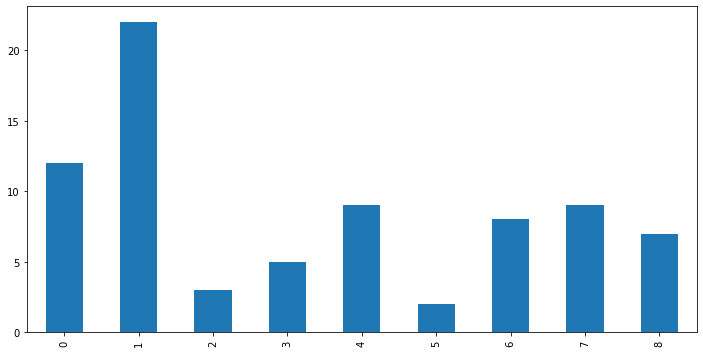

In [70]:
plt.figure(figsize=(12,6))
output_df.Category.value_counts(sort=False).plot(kind='bar')
plt.show()

# Hierarchial Clustering

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [75]:
linkage_matrix = linkage(std_cereal_df, method='ward',metric='euclidean') 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [82.5, 82.5, 113.75, 113.75],
  [60.0, 60.0, 98.125, 98.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [233.75, 233.75, 273.75, 273.75],
  [181.875, 181.875, 253.75, 253.75],
  [150.0, 150.0, 217.8125, 217.8125],
  [79.0625, 79.0625, 183.90625, 183.90625],
  [40.0, 40.0, 131.484375, 131.484375],
  [12.5, 12.5, 85.7421875, 85.7421875],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 

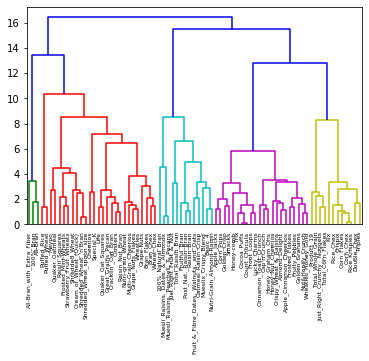

In [92]:
dendrogram(linkage_matrix,labels=std_cereal_df.index)

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
linkage_matrix.shape

(76, 4)

In [96]:
agg_clust = AgglomerativeClustering(n_clusters=6,affinity='euclidean', linkage='ward')

In [97]:
agg_clusters = agg_clust.fit_predict(std_cereal_df)

In [101]:
hier_output = cereal_df
hier_output['Category'] = agg_clusters

In [102]:
hier_output

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,Category
name,,,,,,,,,,,,
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33,3
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00,0
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33,3
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50,3
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75,4
...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.000000,25.0,1.0,0.75,1
Trix,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.000000,25.0,1.0,1.00,4
Wheat_Chex,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.000000,25.0,1.0,0.67,2


In [104]:
cat_name_dict = {}
for i in range(6):
    cat_name_dict[i] = list(hier_output[hier_output.Category==i].index)
cat_name_dict

{0: ['100%_Natural_Bran',
  'Basic_4',
  'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
  'Fruitful_Bran',
  'Just_Right_Fruit_&_Nut',
  'Muesli_Raisins,_Dates,_&_Almonds',
  'Muesli_Raisins,_Peaches,_&_Pecans',
  'Mueslix_Crispy_Blend',
  'Nutri-Grain_Almond-Raisin',
  'Oatmeal_Raisin_Crisp',
  'Post_Nat._Raisin_Bran',
  'Raisin_Bran',
  'Total_Raisin_Bran'],
 1: ['Corn_Chex',
  'Corn_Flakes',
  'Crispix',
  'Double_Chex',
  'Just_Right_Crunchy__Nuggets',
  'Kix',
  'Product_19',
  'Rice_Chex',
  'Rice_Krispies',
  'Total_Corn_Flakes',
  'Total_Whole_Grain',
  'Triples'],
 2: ['Bran_Chex',
  'Bran_Flakes',
  'Cheerios',
  'Clusters',
  "Cracklin'_Oat_Bran",
  'Cream_of_Wheat_(Quick)',
  'Frosted_Mini-Wheats',
  'Grape_Nuts_Flakes',
  'Grape-Nuts',
  'Great_Grains_Pecan',
  'Life',
  'Maypo',
  'Multi-Grain_Cheerios',
  'Nutri-grain_Wheat',
  'Quaker_Oat_Squares',
  'Quaker_Oatmeal',
  'Raisin_Nut_Bran',
  'Raisin_Squares',
  'Shredded_Wheat',
  "Shredded_Wheat_'n'Bran",
  'Shredded_Wheat_s